### __Defining an SMA Crossover Strategy__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
# EUR/USD 가격 데이터를 불러온 뒤 data 데이터프레임에 저장
data = pd.read_csv('Course_Materials/eurusd.csv', parse_dates=['Date'], index_col='Date')
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
# 단기 SMA와 장기 SMA를 정의
# 대중적으로 단기 50/ 장기 200이 사용됨
sma_s = 50
sma_l = 200

#### 단순이동평균을 구하는 데는 2단계가 필요
1. 롤링 혹은 이동창을 정의하고 생성해야 함
    - .rolling() 메소드를 사용함
    - 매개변수에 window가 있음
    - 매개변수에 입력되는 숫자가 윈도우 사이즈

In [7]:
# window 매개변수에 50을 대입하여 롤링 객체를 얻음
data.price.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

2. 평균 또는 합계와 같은 집계 메소드를 연결해야 함
- 이 예제의 경우는 이동평균을 구하기 때문에 지난 50일 동안 거래일의 평균을 취함 

In [8]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

- 49일 간의 결측치는 가장 최근 50일간의 가격이 없기 때문에 나타남
- 50번째 타임스탬프부터 롤링 평균을 얻게 됨
- 이 데이터를 기반으로 단기(50일)/장기(200일)의 SMA를 생성


In [9]:
data['SMA_S'] = data.price.rolling(sma_s).mean()
data['SMA_L'] = data.price.rolling(sma_l).mean()
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


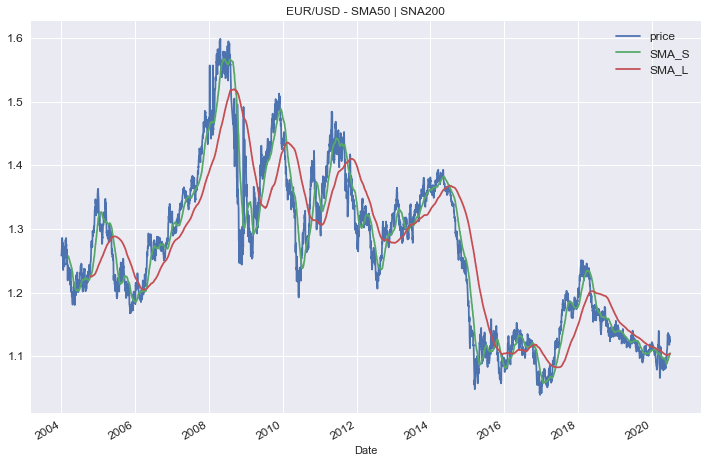

In [10]:
# 데이터프레임 시각화
data.plot(figsize=(12,8), title='EUR/USD - SMA{} | SNA{}'.format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [11]:
# 초기 데이터는 삭제(결측치)
data.dropna(inplace= True)
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


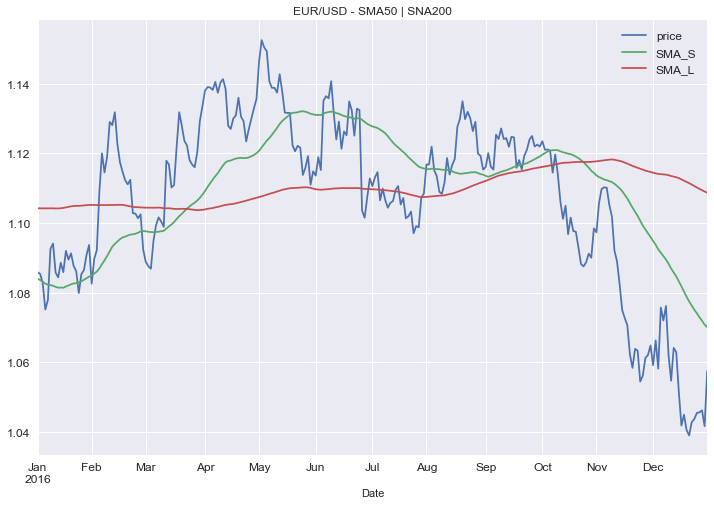

In [14]:
# 데이터프레임 시각화
data.loc['2016'].plot(figsize=(12,8), title='EUR/USD - SMA{} | SNA{}'.format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

- 새로운 열 'position' 생성
- 숏 포지션은 -1, 롱 포지션은 +1

In [16]:
# 모든 타임스탬프에 대해서 'SMA_S'가 'SMA_L'보다 크다면 +1 포지션을 가짐
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


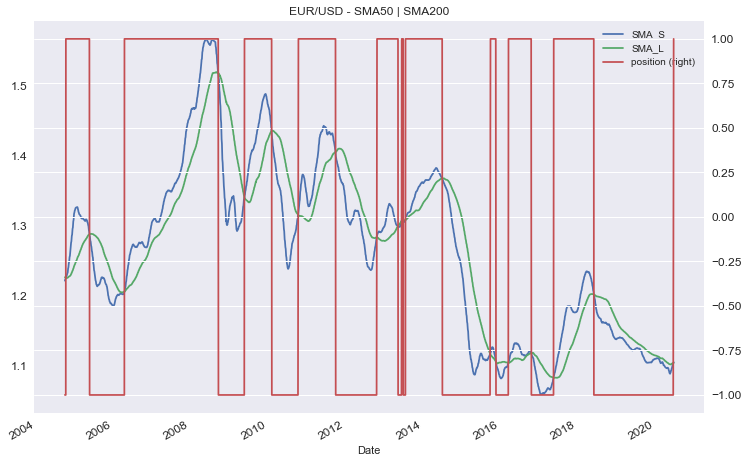

In [18]:
# SMA_S, SMA_A, position 열을 하나의 플롯에 그릴 수 있음
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.show()

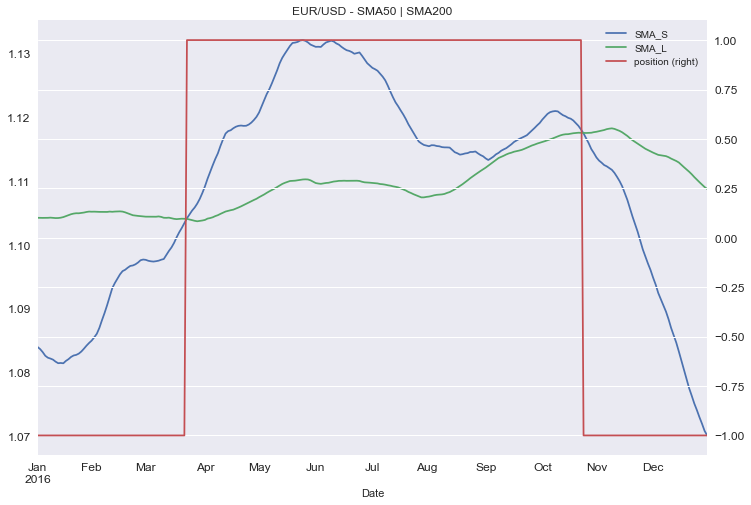

In [19]:
# SMA_S, SMA_A, position 열을 하나의 플롯에 그릴 수 있음
data.loc['2016', ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.show()

### __Vectorized Strategy Backtesting__

In [21]:
# 보유 일일 수익률 returns 추가
data['returns'] = np.log(data.price.div(data.price.shift(1)))
# 특정 날짜의 포지션이 롱일때마다, 전략의 수익률은 매수 후 보유와 같음
# 포지션이 숏일때마다, 전략의 수익률은 매수 후 보유 -1
data['strategy'] = data.position.shift(1) * data['returns']
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [22]:
# 결측치 제거
data.dropna(inplace=True)

In [23]:
# absolute performance
data[['returns', 'strategy']].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [24]:
# absolute performance
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [25]:
# anualized return
data[['returns', 'strategy']].mean() * 252

returns    -0.005438
strategy    0.015435
dtype: float64

In [26]:
# anualized rist
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [27]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)

In [28]:
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [29]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


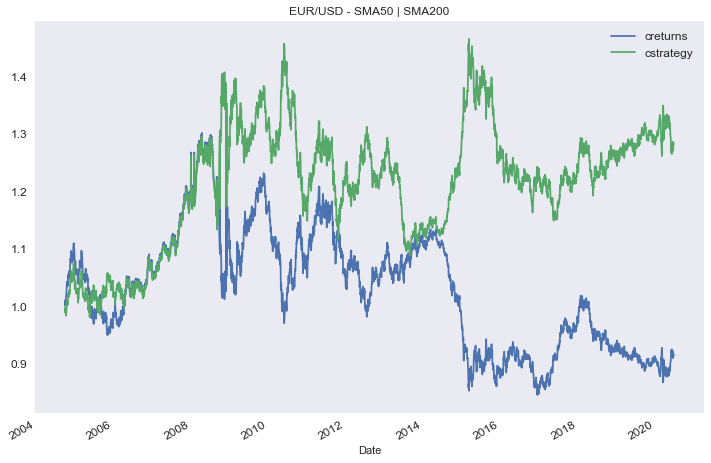

In [31]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()